In [4]:
import praw
import logging

# Basic PRAW configurations
praw_check_for_updates = True;

reddit = praw.Reddit(client_id='JGsZuXq7VpFVEA', client_secret='h9DeqRqFYfx5EpacRzS_jzmnfbA',
                     password='moogirl1017', user_agent='web:u\SneakyFeetBot:v0.0 (by /u/x60s)',
                     username='SneakyFeetBot')

In [5]:
handler = logging.StreamHandler()
handler.setLevel(logging.DEBUG)
logger = logging.getLogger('prawcore')
logger.setLevel(logging.DEBUG)
logger.addHandler(handler)

In [6]:
from PIL import Image
import requests
from io import BytesIO

subreddit = reddit.subreddit('SneakyBackgroundFeet')
for submission in subreddit.stream.submissions():
    link = submission.url
    response = requests.get(link)
    img = Image.open(BytesIO(response.content))
    # feetDetect(img)
    submission.reply("Sneaky background feet spotted. Here's some shoes.")

Fetching: GET https://oauth.reddit.com/r/SneakyBackgroundFeet/new
Data: None
Params: {'before': None, 'limit': 100, 'raw_json': 1}
Response: 200 (61000 bytes)
Fetching: POST https://oauth.reddit.com/api/comment/
Data: [('api_type', 'json'), ('text', "Sneaky background feet spotted. Here's some shoes."), ('thing_id', 't3_90cmiq')]
Params: {'raw_json': 1}
Response: 200 (106 bytes)


APIException: RATELIMIT: 'you are doing that too much. try again in 7 minutes.' on field 'ratelimit'

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def feetDetect(img):
    edges = cv2.Canny(img,100,200)
    plt.imshow(img)
    plt.show()

TypeError: Invalid dimensions for image data

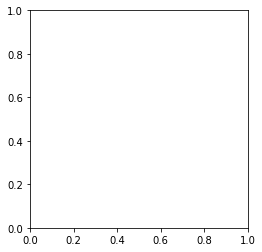

In [24]:
response = requests.get('https://i.redd.it/abhe4wspske11.jpg')
pil_img = Image.open(BytesIO(response.content)).convert('LA')
opencv_image = np.array(pil_img)
plt.imshow(opencv_image)
plt.show()
feetDetect(opencv_image)

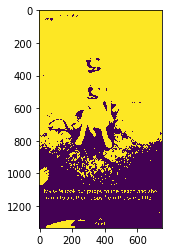

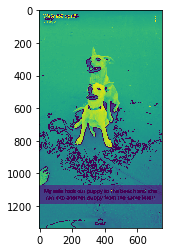

In [48]:
img = cv2.imread('gp6z54yj4fb11.jpg',cv2.IMREAD_GRAYSCALE)
blur = cv2.medianBlur(img,5)
ret, thresh = cv2.threshold(blur, 127, 255, 0)
im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(im2)
plt.show()
plt.imshow(cv2.drawContours(img, contours, -1, (0,255,0), 3))
plt.show()

In [2]:
import tensorflow
import keras
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = 'gp6z54yj4fb11.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 3us/step
Predicted: [('n02085620', 'Chihuahua', 0.40121508), ('n02110958', 'pug', 0.2413139), ('n02099712', 'Labrador_retriever', 0.07092302)]
